# Breast Cancer

# Exploratory Data Analysis

In [82]:
#Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.model_selection import GridSearchCV

In [42]:
# Importing the dataset
data = pd.read_csv("wdbc.csv")

### Inspecting and cleaning

In [43]:
#Printing the 1st 5 columns
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractional_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [44]:
# Printing the dimenions of data
data.shape

(569, 32)

In [45]:
# Viewing the column heading
data.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractional_dimensions_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractional_dimension_worst'],
      dtype='object')

In [46]:
# Inspecting the target variable
data.diagnosis.value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

In [47]:
data.dtypes

id                              int64
diagnosis                      object
radius_mean                   float64
texture_mean                  float64
perimeter_mean                float64
area_mean                     float64
smoothness_mean               float64
compactness_mean              float64
concavity_mean                float64
concave points_mean           float64
symmetry_mean                 float64
fractal_dimension_mean        float64
radius_se                     float64
texture_se                    float64
perimeter_se                  float64
area_se                       float64
smoothness_se                 float64
compactness_se                float64
concavity_se                  float64
concave points_se             float64
symmetry_se                   float64
fractional_dimensions_se      float64
radius_worst                  float64
texture_worst                 float64
perimeter_worst               float64
area_worst                    float64
smoothness_w

In [48]:
#Identifying the unique number of values in the dataset
data.nunique()

id                            569
diagnosis                       2
radius_mean                   456
texture_mean                  479
perimeter_mean                522
area_mean                     539
smoothness_mean               474
compactness_mean              537
concavity_mean                537
concave points_mean           542
symmetry_mean                 432
fractal_dimension_mean        499
radius_se                     540
texture_se                    519
perimeter_se                  533
area_se                       528
smoothness_se                 547
compactness_se                541
concavity_se                  533
concave points_se             507
symmetry_se                   498
fractional_dimensions_se      545
radius_worst                  457
texture_worst                 511
perimeter_worst               514
area_worst                    544
smoothness_worst              411
compactness_worst             529
concavity_worst               539
concave points

In [49]:
# Checking if any NULL values are present in the dataset
data.isnull().sum()

id                            0
diagnosis                     0
radius_mean                   0
texture_mean                  0
perimeter_mean                0
area_mean                     0
smoothness_mean               0
compactness_mean              0
concavity_mean                0
concave points_mean           0
symmetry_mean                 0
fractal_dimension_mean        0
radius_se                     0
texture_se                    0
perimeter_se                  0
area_se                       0
smoothness_se                 0
compactness_se                0
concavity_se                  0
concave points_se             0
symmetry_se                   0
fractional_dimensions_se      0
radius_worst                  0
texture_worst                 0
perimeter_worst               0
area_worst                    0
smoothness_worst              0
compactness_worst             0
concavity_worst               0
concave points_worst          0
symmetry_worst                0
fraction

In [51]:
# See rows with missing values
data[data.isnull().any(axis=1)]

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractional_dimension_worst


In [53]:
# Viewing the data statistics
data.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractional_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


### Visualization

In [54]:
# Finding out the correlation between the features
corr = data.corr()
corr.shape

(31, 31)

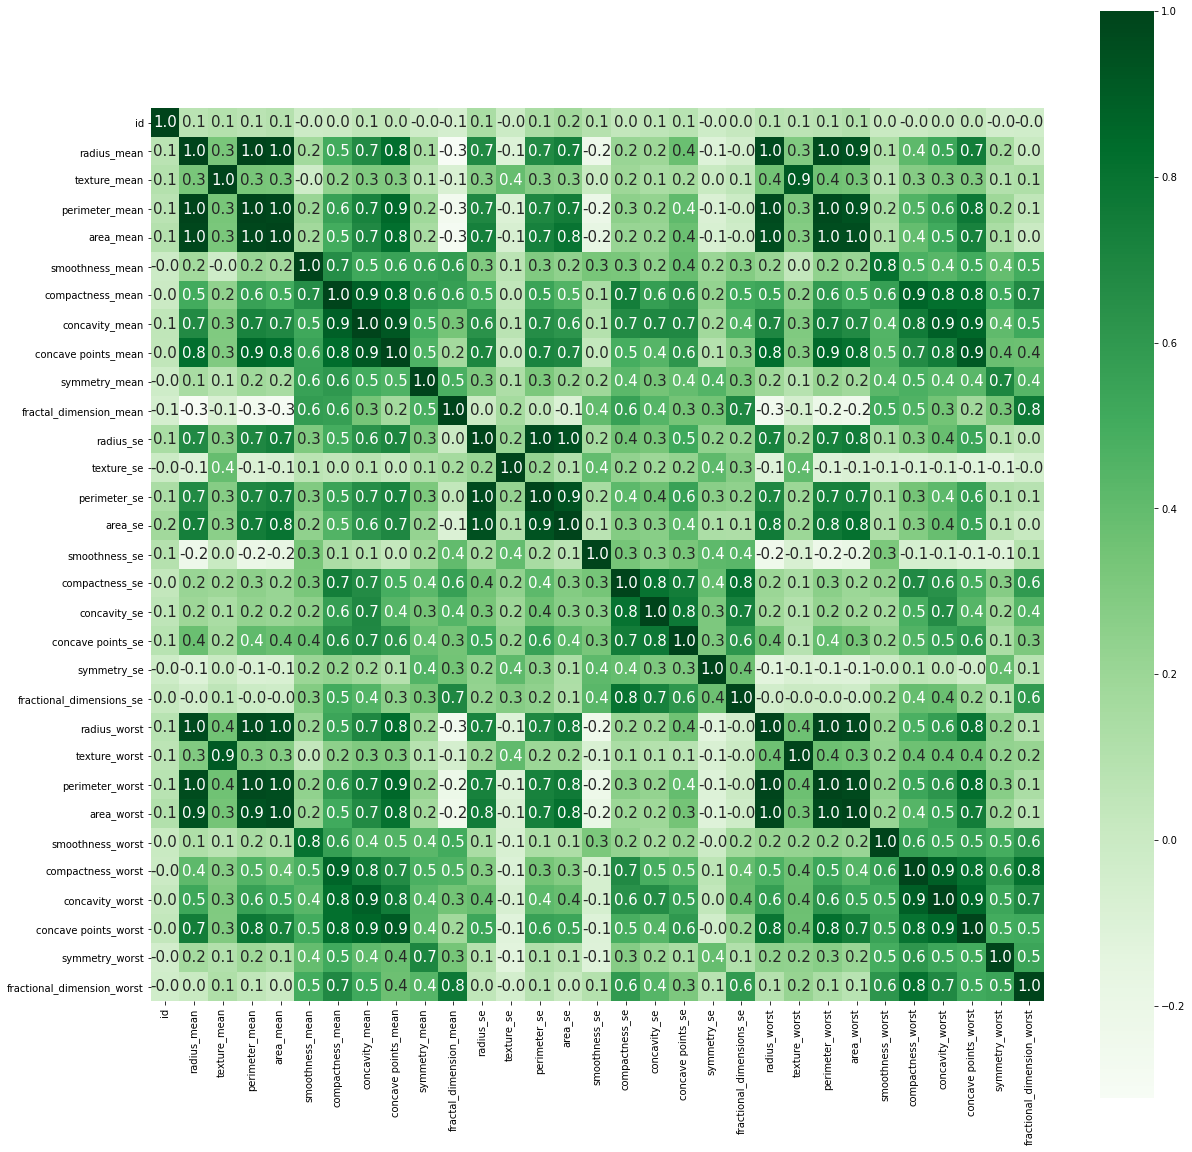

In [55]:
# Plotting the heatmap of correlation between features
plt.figure(figsize=(20,20))
sns.heatmap(corr, cbar=True, square= True, fmt='.1f', annot=True, annot_kws={'size':15}, cmap='Greens')
plt.show()

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


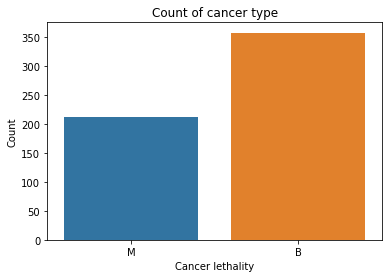

In [56]:
# Analyzing the target variable

plt.title('Count of cancer type')
sns.countplot(data['diagnosis'])
plt.xlabel('Cancer lethality')
plt.ylabel('Count')
plt.show()

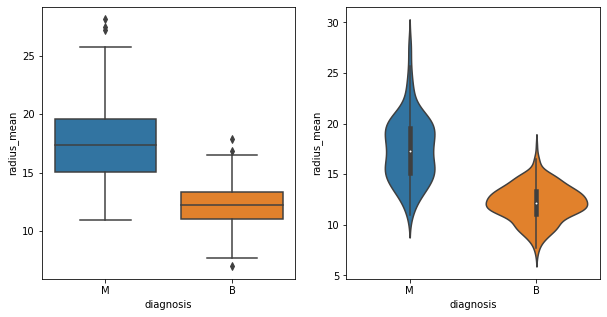

In [107]:
# Plotting correlation between diagnosis and radius

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.boxplot(x="diagnosis", y="radius_mean", data=data)
plt.subplot(1,2,2)
sns.violinplot(x="diagnosis", y="radius_mean", data=data)
plt.show()

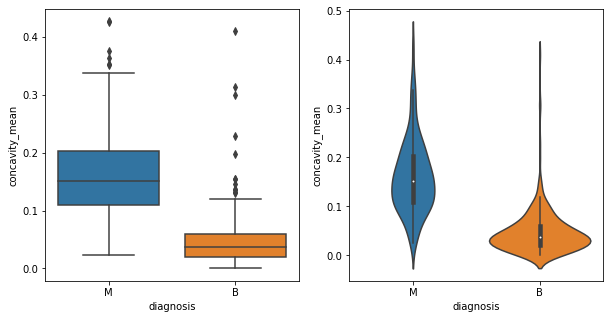

In [58]:
# Plotting correlation between diagnosis and concativity

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.boxplot(x="diagnosis", y="concavity_mean", data=data)
plt.subplot(1,2,2)
sns.violinplot(x="diagnosis", y="concavity_mean", data=data)
plt.show()

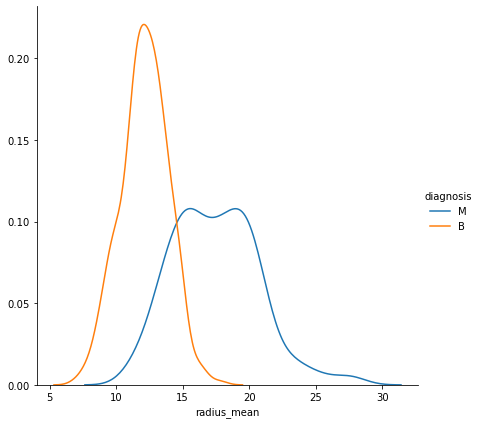

In [59]:
# Distribution density plot KDE (kernel density estimate)
sns.FacetGrid(data, hue="diagnosis", height=6).map(sns.kdeplot, "radius_mean").add_legend()
plt.show()

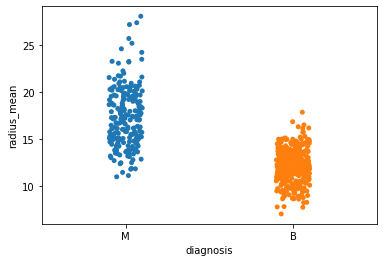

In [60]:
# Plotting the distribution of the mean radius
sns.stripplot(x="diagnosis", y="radius_mean", data=data, jitter=True, edgecolor="gray")
plt.show()

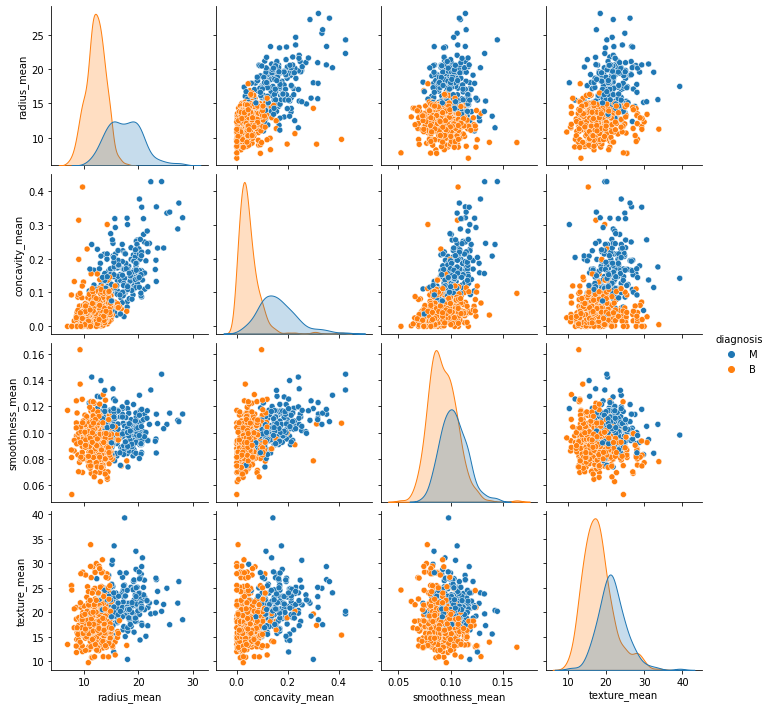

In [61]:
# Plotting bivariate relations between each pair of features (4 features x4 so 16 graphs) with hue = "diagnosis"
sns.pairplot(data, hue="diagnosis", vars = ["radius_mean", "concavity_mean", "smoothness_mean", "texture_mean"])
plt.show()

### Train - test split

In [62]:
# Spliting target variable and independent variables
X = data.drop(['diagnosis'], axis = 1)
y = data['diagnosis']

In [63]:
# Splitting the data into training set and testset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 0)
print("Size of training set:", X_train.shape)
print("Size of training set:", X_test.shape)

Size of training set: (398, 31)
Size of training set: (171, 31)


### Logistic Regression

In [64]:
# Logistic Regression

# Import library for LogisticRegression
from sklearn.linear_model import LogisticRegression

# Create a Logistic regression classifier
logreg = LogisticRegression()

# Train the model using the training sets 
logreg.fit(X_train, y_train)

LogisticRegression()

In [65]:
# Prediction on test data
y_pred = logreg.predict(X_test)

In [66]:
# Calculating the accuracy
acc_logreg = round( metrics.accuracy_score(y_test, y_pred) * 100, 2 )
print( 'Accuracy of Logistic Regression model : ', acc_logreg )

Accuracy of Logistic Regression model :  63.16


### Gaussian naive bayes model

In [67]:
# Gaussian Naive Bayes

# Import library of Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB

# Create a Gaussian Classifier
model = GaussianNB()

# Train the model using the training sets 
model.fit(X_train,y_train)

GaussianNB()

In [68]:
# Prediction on test data
y_pred = logreg.predict(X_test)

In [100]:
# Calculating the accuracy
acc_nb = round( metrics.accuracy_score(y_test, y_pred) * 100, 2 )
print( 'Accuracy of Gaussian Naive Bayes model : ', acc_nb )

Accuracy of Gaussian Naive Bayes model :  95.91


### Decision tree

In [85]:
# Decision Tree Classifier

# Import Decision tree classifier
from sklearn.tree import DecisionTreeClassifier

# Create a Decision tree classifier model
clf = DecisionTreeClassifier()

# Hyperparameter Optimization
parameters = {'max_features': ['log2', 'sqrt','auto'], 
              'criterion': ['entropy', 'gini'],
              'max_depth': [2, 3, 5, 10, 50], 
              'min_samples_split': [2, 3, 50, 100],
              'min_samples_leaf': [1, 5, 8, 10]
             }

# Run the grid search
grid_obj = GridSearchCV(clf, parameters)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
clf = grid_obj.best_estimator_

# Train the model using the training sets 
clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, max_features='auto',
                       min_samples_leaf=10, min_samples_split=3)

In [86]:
# Prediction on test set
y_pred = clf.predict(X_test)

In [87]:
# Calculating the accuracy
acc_dt = round( metrics.accuracy_score(y_test, y_pred) * 100, 2 )
print( 'Accuracy of Decision Tree model : ', acc_dt )

Accuracy of Decision Tree model :  92.4


### Random forest

In [89]:
#Random Forest Classifier

# Import library of RandomForestClassifier model
from sklearn.ensemble import RandomForestClassifier

# Create a Random Forest Classifier
rf = RandomForestClassifier()

# Hyperparameter Optimization
parameters = {'n_estimators': [4, 6, 9, 10, 15], 
              'max_features': ['log2', 'sqrt','auto'], 
              'criterion': ['entropy', 'gini'],
              'max_depth': [2, 3, 5, 10], 
              'min_samples_split': [2, 3, 5],
              'min_samples_leaf': [1, 5, 8]
             }

# Run the grid search
grid_obj = GridSearchCV(rf, parameters)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the rf to the best combination of parameters
rf = grid_obj.best_estimator_

# Train the model using the training sets 
rf.fit(X_train,y_train)

RandomForestClassifier(max_depth=10, max_features='log2', min_samples_split=3,
                       n_estimators=9)

In [90]:
# Prediction on test data
y_pred = rf.predict(X_test)

In [91]:
# Calculating the accuracy
acc_rf = round( metrics.accuracy_score(y_test, y_pred) * 100 , 2 )
print( 'Accuracy of Random Forest model : ', acc_rf )

Accuracy of Random Forest model :  95.32


### SVM

In [92]:
# SVM Classifier

# Creating scaled set to be used in model to improve the results
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [93]:
# Import Library of Support Vector Machine model
from sklearn import svm

# Create a Support Vector Classifier
svc = svm.SVC()

# Hyperparameter Optimization
parameters = [
  {'C': [1, 10, 100, 1000], 'kernel': ['linear']},
  {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001], 'kernel': ['rbf']},
]

# Run the grid search
grid_obj = GridSearchCV(svc, parameters)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the svc to the best combination of parameters
svc = grid_obj.best_estimator_

# Train the model using the training sets 
svc.fit(X_train,y_train)

SVC(C=1000, gamma=0.0001)

In [94]:
# Prediction on test data
y_pred = svc.predict(X_test)

In [95]:
# Calculating the accuracy
acc_svm = round( metrics.accuracy_score(y_test, y_pred) * 100, 2 )
print( 'Accuracy of SVM model : ', acc_svm )

Accuracy of SVM model :  97.08


### K-NN 

In [96]:
# K - Nearest Neighbors

# Import library of KNeighborsClassifier model
from sklearn.neighbors import KNeighborsClassifier

# Create a KNN Classifier
knn = KNeighborsClassifier()

# Hyperparameter Optimization
parameters = {'n_neighbors': [3, 4, 5, 10], 
              'weights': ['uniform', 'distance'],
              'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute'],
              'leaf_size' : [10, 20, 30, 50]
             }

# Run the grid search
grid_obj = GridSearchCV(knn, parameters)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the knn to the best combination of parameters
knn = grid_obj.best_estimator_

# Train the model using the training sets 
knn.fit(X_train,y_train)

KNeighborsClassifier(leaf_size=10, n_neighbors=10, weights='distance')

In [97]:
# Prediction on test data
y_pred = knn.predict(X_test)

In [98]:
#calculating the accuracy 
acc_knn = round( metrics.accuracy_score(y_test, y_pred) * 100, 2 )
print( 'Accuracy of KNN model : ', acc_knn )

Accuracy of KNN model :  95.91


## Evaluation and comparision

In [101]:
models = pd.DataFrame({
    'Model': ['Logistic Regression', 'Naive Bayes', 'Decision Tree', 'Random Forest', 'Support Vector Machines', 
              'K - Nearest Neighbors'],
    'Score': [acc_logreg, acc_nb, acc_dt,  acc_rf, acc_svm, acc_knn]})
models.sort_values(by='Score', ascending=False)

,Model,Score
4,Support Vector Machines,97.08
1,Naive Bayes,95.91
5,K - Nearest Neighbors,95.91
3,Random Forest,95.32
2,Decision Tree,92.40
0,Logistic Regression,63.16
